## Import Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

## Loading Dataset

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.shape

(891, 12)

* There are 891 rows and 12 columns

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* Age, Cabin and Embarked are the features with null value.

## Handling Wrong data and null values

In [8]:
df.drop('Cabin',axis=1,inplace=True)

In [9]:
df.duplicated().any()

False

In [10]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [12]:
df.dropna(inplace=True)

In [13]:
n_cols=df.select_dtypes(include=['int','float']).columns
n_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:
c_cols=df.select_dtypes(include='O').columns
c_cols

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

## Doing Univariate Analysis

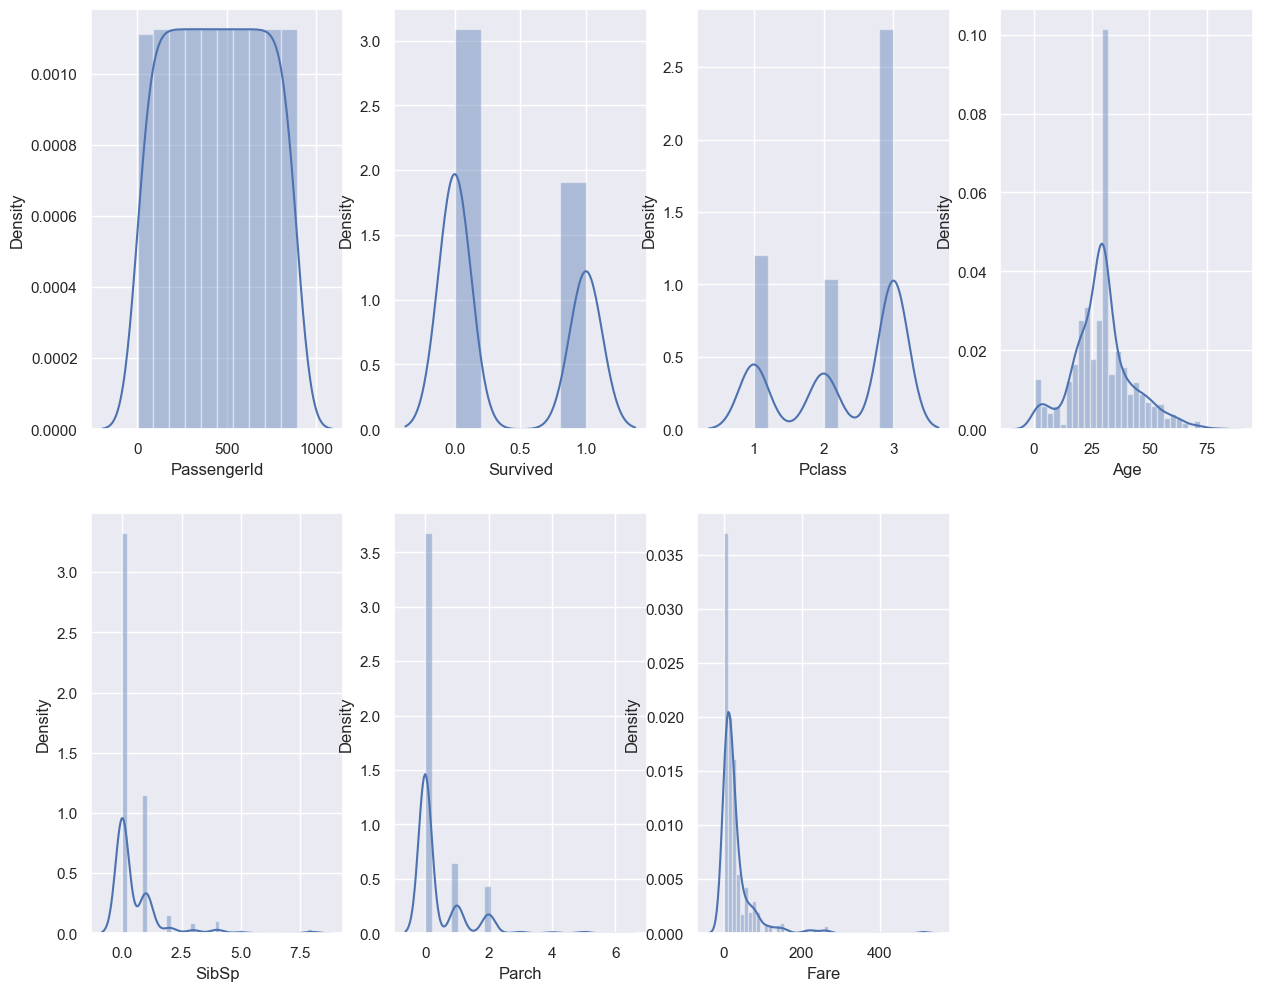

In [15]:
sns.set()
plt.figure(figsize=(15,12))
count=1
for i in n_cols:
    plt.subplot(2,4,count)
    sns.distplot(df[i])
    count+=1
plt.show()

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

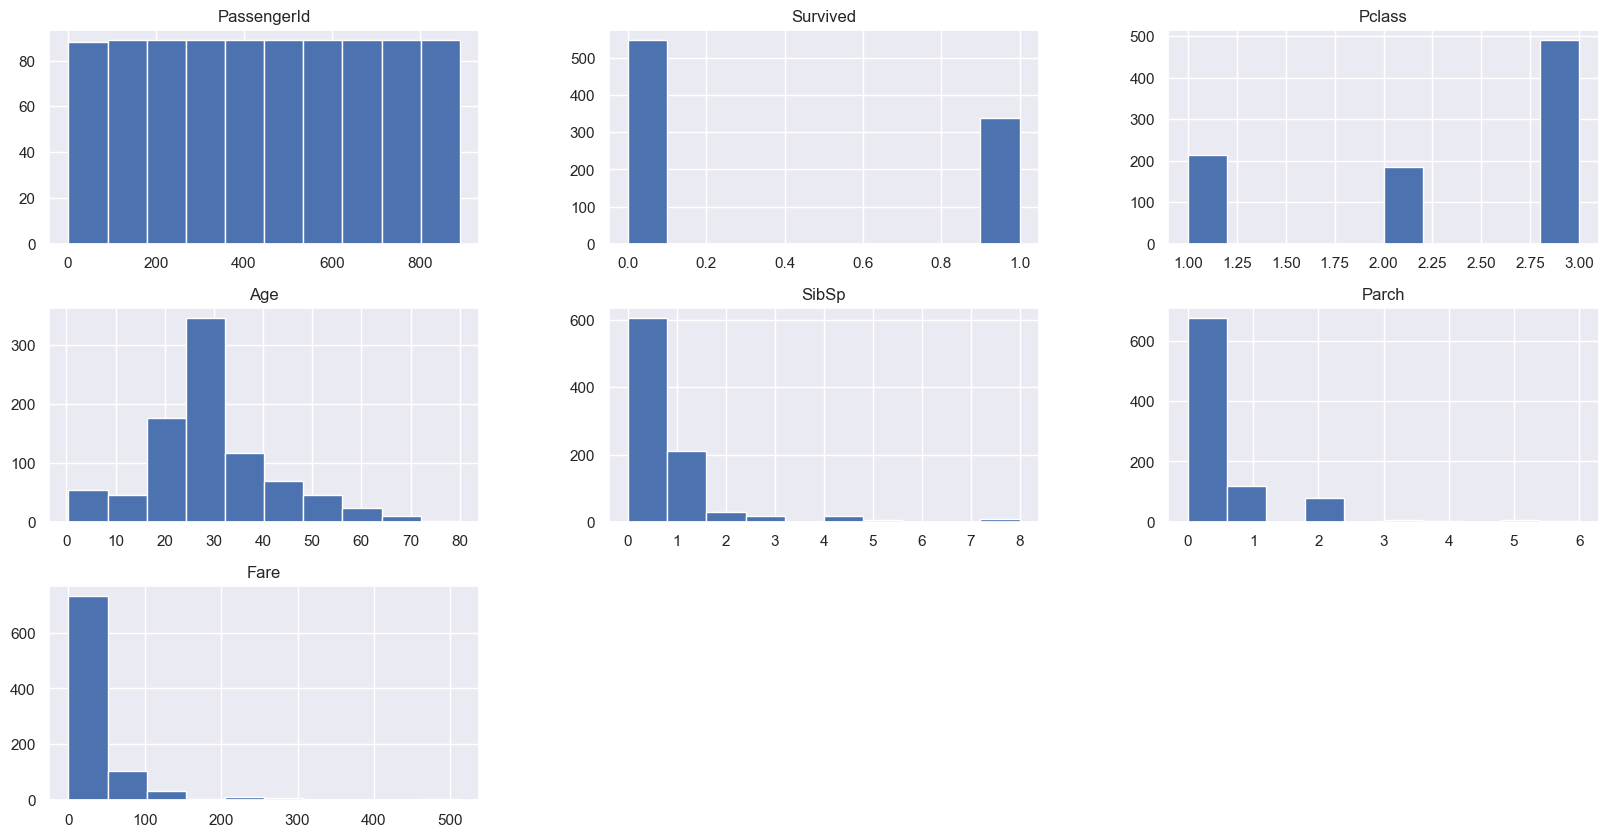

In [18]:
p=df.hist(figsize=(20,10))

## Survival Count

In [19]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

* Only about 342 people survived out of 891.

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

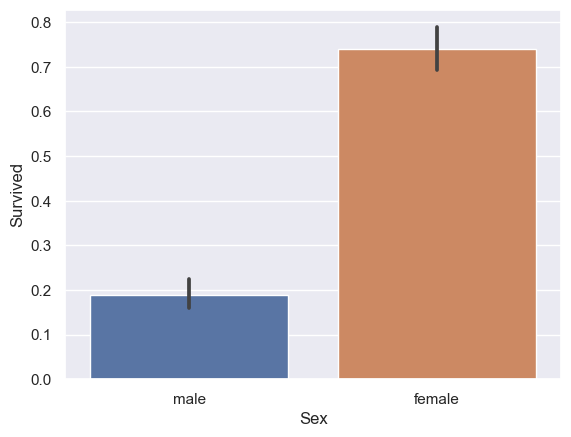

In [21]:
sns.barplot(data=df, x="Sex", y="Survived")

* Number of female survivors are more compare to male.

## Correlation Between the features

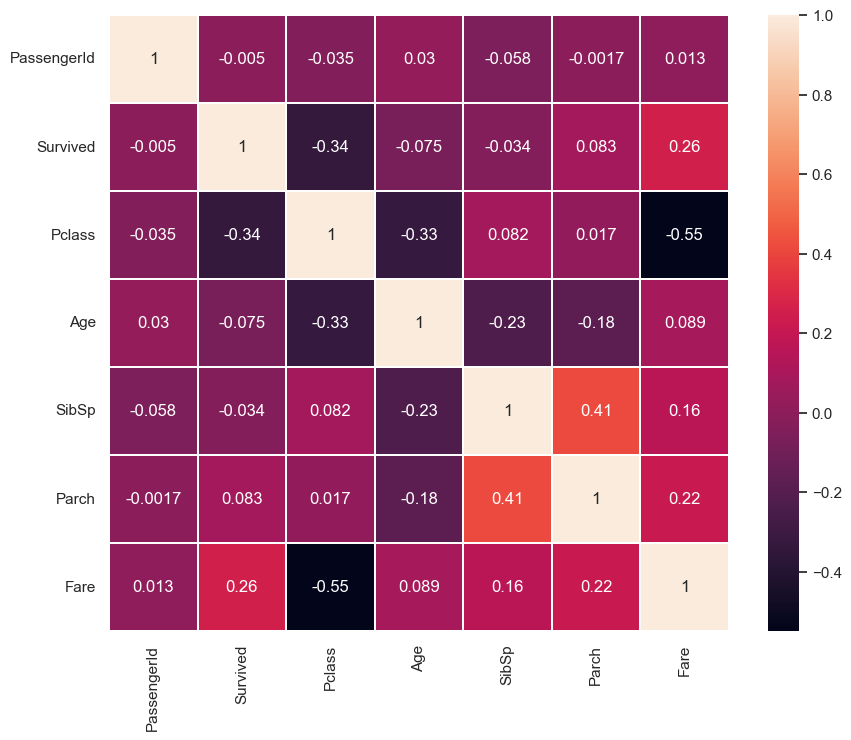

In [22]:
sns.heatmap(df.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

* Features are less correlated to each other.

## Analysing the Features

#### Seeing the survival rate according to Sex

In [23]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64

From this, we can see that only around 18% of men survived while around 75% of women survived.

#### Checking the Age group

In [27]:
print('Mean Age',df.Age.mean())
print('Max Age',df.Age.max())
print('Min Age',df.Age.min())

Mean Age 29.65344637067425
Max Age 80.0
Min Age 0.42


* Survival rate for children below 10 are pretty good.
* Pclass1 passengers had a higher survival rate between 20-50 age group.
* Survival rate for men decrease with increase in age.

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

In [31]:
df['Initial'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

In [32]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [33]:
df['Initial'].value_counts()

Mr        529
Miss      185
Mrs       126
Master     40
Other       9
Name: Initial, dtype: int64

In [34]:
df.groupby('Initial')['Age'].mean()

Initial
Master     7.086662
Miss      23.298207
Mr        32.049894
Mrs       34.927659
Other     45.888889
Name: Age, dtype: float64

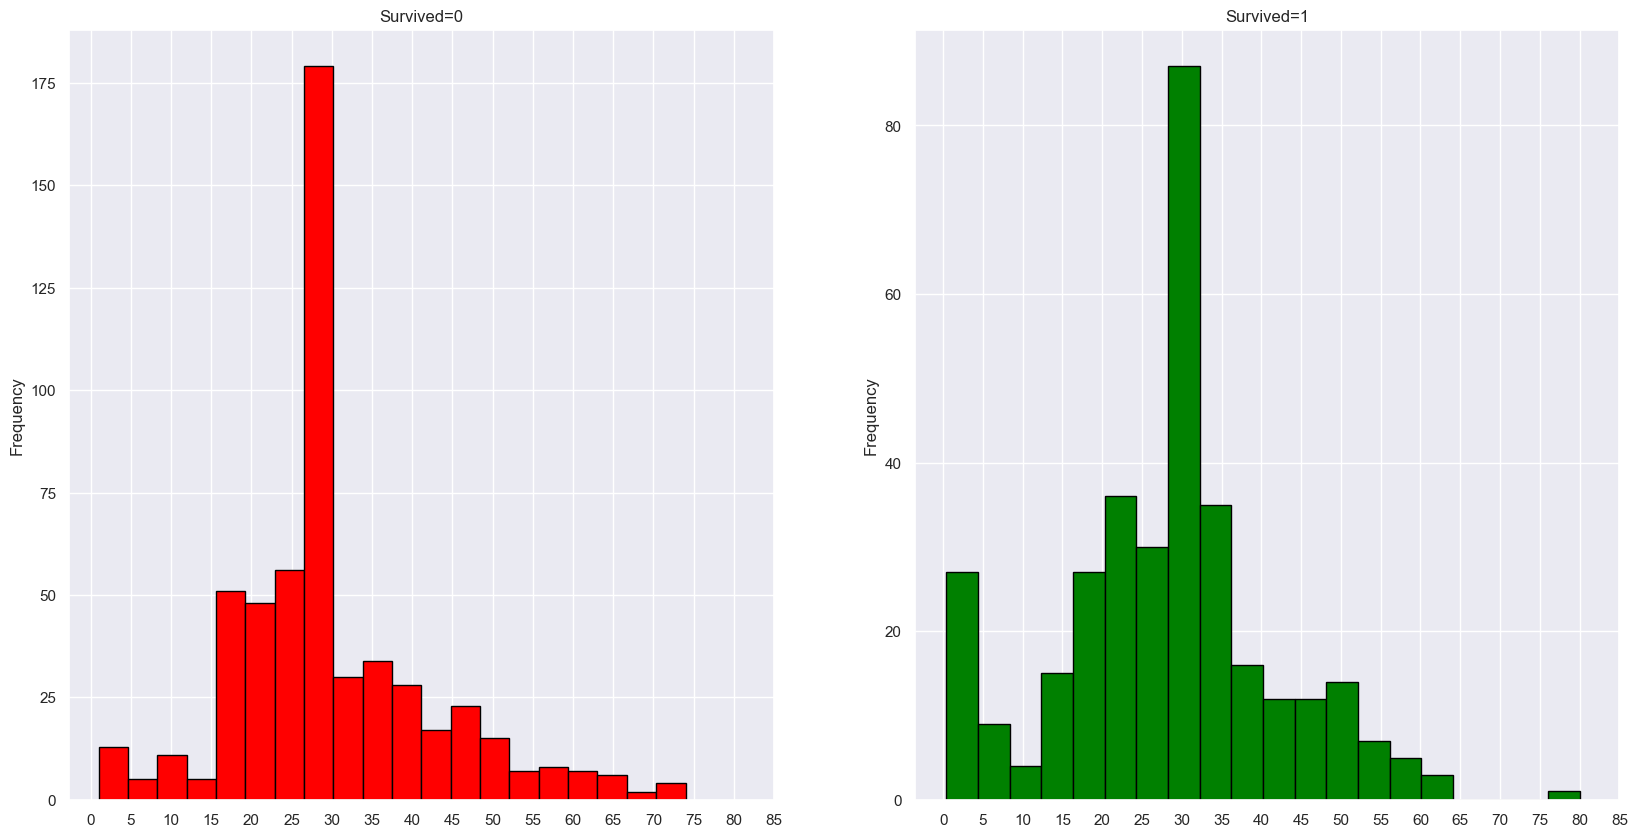

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
ax[0].set_xticks(range(0,90,5))
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived=1')
ax[1].set_xticks(range(0,90,5));

* Most deaths occured at age of 30-40.
* Oldest person who survived is of age above 80.
* Childrens where saved in large number.

Women and children had the highest survival rate

#### Looking for maximum and minimum Fare

In [43]:
print('max fare:',df.Fare.max())
print('min fare:',df.Fare.min())
print('mean fare:',df.Fare.mean())

max fare: 512.3292
min fare: 0.0
mean fare: 32.09668087739032


In [44]:
df['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

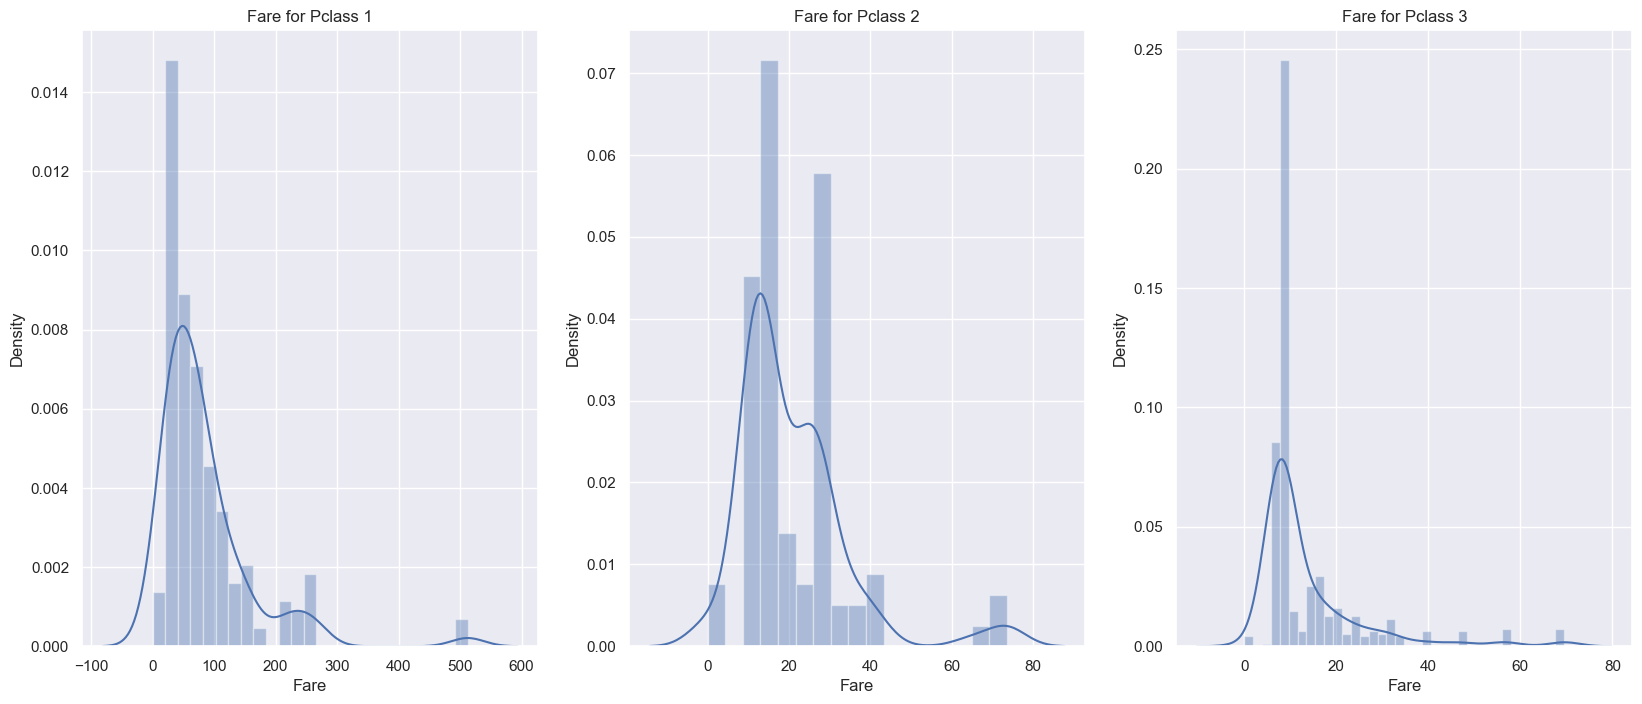

In [45]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fare for Pclass 1')
sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fare for Pclass 2')
sns.distplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fare for Pclass 3')
plt.show();

In [46]:
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,231,109


In [47]:
df['Age'].max()

80.0

In [48]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=age_labels)
print(df.groupby(['age_group']).Survived.mean())

age_group
0-9      0.612903
10-19    0.401961
20-29    0.324937
30-39    0.433735
40-49    0.382022
50-59    0.416667
60-69    0.277778
70-79    0.000000
Name: Survived, dtype: float64


In [49]:
df.groupby(['age_group']).size()

age_group
0-9       62
10-19    102
20-29    397
30-39    166
40-49     89
50-59     48
60-69     18
70-79      6
dtype: int64

Text(0.5, 0, 'Age Group')

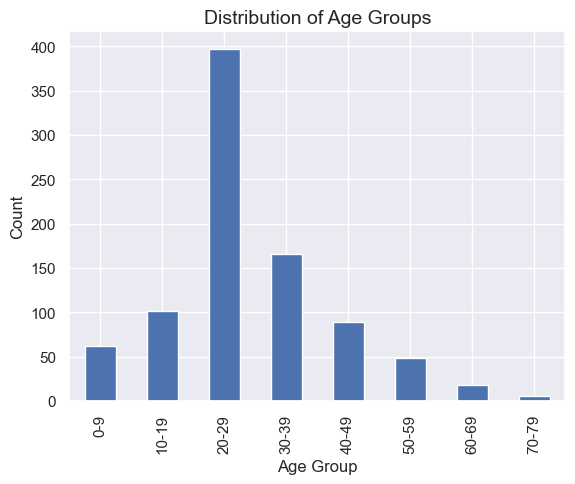

In [50]:
df.groupby(['age_group']).size().plot(kind='bar')
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group')

## Preprocessing

In [53]:
le=LabelEncoder()

In [54]:
co_cols=df.select_dtypes(include='O').columns
co_cols

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Initial'], dtype='object')

In [55]:
for i in co_cols:
    df[i]=le.fit_transform(df[i])

In [56]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial,age_group
0,1,0,3,108,1,22.000000,1,0,522,7.2500,2,2,20-29
1,2,1,1,190,0,38.000000,1,0,595,71.2833,0,3,30-39
2,3,1,3,353,0,26.000000,0,0,668,7.9250,2,1,20-29
3,4,1,1,272,0,35.000000,1,0,48,53.1000,2,3,30-39
4,5,0,3,15,1,35.000000,0,0,471,8.0500,2,2,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,547,1,27.000000,0,0,100,13.0000,2,4,20-29
887,888,1,1,303,0,19.000000,0,0,14,30.0000,2,1,10-19
888,889,0,3,412,0,29.699118,1,2,674,23.4500,2,1,20-29
889,890,1,1,81,1,26.000000,0,0,8,30.0000,0,2,20-29


In [57]:
df=df.drop(["PassengerId", "Name", "Ticket", "Initial","age_group"],axis=1)

In [58]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [59]:
from sklearn.model_selection import train_test_split

x=df.drop("Survived", axis=1)
y=df["Survived"]


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=777)
print('x_train shape',x_train.shape,'y_train shape',y_train.shape)
print('y_test shape',x_test.shape,'y_test shape',y_test.shape)

x_train shape (711, 7) y_train shape (711,)
y_test shape (178, 7) y_test shape (178,)


In [68]:
from sklearn.metrics import classification_report
def my_model(model):
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('Train Data')
    print(classification_report(y_train,y_pred_train))
    print('Test Data')
    print(classification_report(y_test,y_pred_test))
    return model

In [69]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
my_model(reg)

Train Data
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       450
           1       0.78      0.72      0.75       261

    accuracy                           0.82       711
   macro avg       0.81      0.80      0.80       711
weighted avg       0.82      0.82      0.82       711

Test Data
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        99
           1       0.78      0.58      0.67        79

    accuracy                           0.74       178
   macro avg       0.75      0.73      0.73       178
weighted avg       0.75      0.74      0.73       178



LogisticRegression()

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
my_model(knn)

Train Data
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       450
           1       0.76      0.69      0.72       261

    accuracy                           0.81       711
   macro avg       0.80      0.78      0.79       711
weighted avg       0.80      0.81      0.80       711

Test Data
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        99
           1       0.79      0.57      0.66        79

    accuracy                           0.74       178
   macro avg       0.75      0.72      0.73       178
weighted avg       0.75      0.74      0.73       178



KNeighborsClassifier()

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
my_model(dt)

Train Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       450
           1       1.00      0.97      0.98       261

    accuracy                           0.99       711
   macro avg       0.99      0.98      0.99       711
weighted avg       0.99      0.99      0.99       711

Test Data
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        99
           1       0.74      0.57      0.64        79

    accuracy                           0.72       178
   macro avg       0.72      0.70      0.71       178
weighted avg       0.72      0.72      0.71       178



DecisionTreeClassifier()

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
my_model(rf)

Train Data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       450
           1       0.99      0.98      0.98       261

    accuracy                           0.99       711
   macro avg       0.99      0.99      0.99       711
weighted avg       0.99      0.99      0.99       711

Test Data
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        99
           1       0.83      0.62      0.71        79

    accuracy                           0.78       178
   macro avg       0.79      0.76      0.76       178
weighted avg       0.78      0.78      0.77       178



RandomForestClassifier()

In [73]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
my_model(ad)

Train Data
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       450
           1       0.80      0.76      0.78       261

    accuracy                           0.84       711
   macro avg       0.83      0.82      0.83       711
weighted avg       0.84      0.84      0.84       711

Test Data
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        99
           1       0.80      0.66      0.72        79

    accuracy                           0.78       178
   macro avg       0.78      0.76      0.77       178
weighted avg       0.78      0.78      0.77       178



AdaBoostClassifier()

# From above model you can see the model gives perfect accuracy score on Adaboost and Logistic regression then the rest of algortithm